In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Credit_Card_Customer_Data.csv")

In [3]:
df.head(n=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
df.drop(['Sl_No'], axis=1, inplace=True)

In [7]:
df['Customer Key'].nunique()

655

In [8]:
df.drop(['Customer Key'], axis=1, inplace=True)

In [9]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


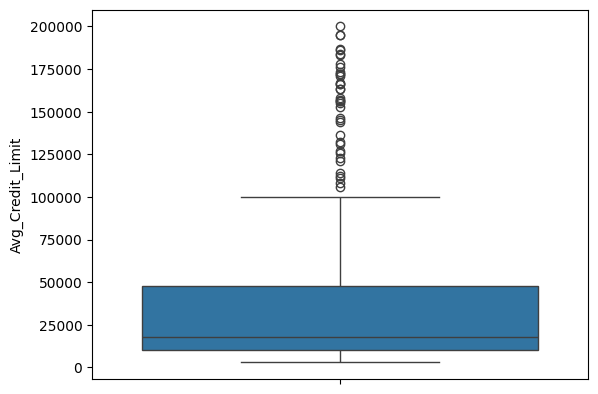

In [10]:
sns.boxplot(data=df['Avg_Credit_Limit'])
plt.show()

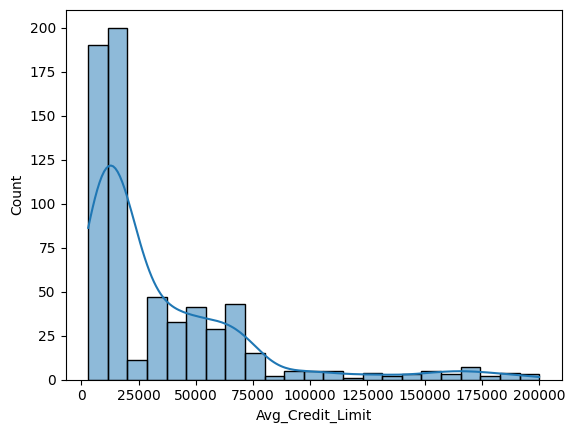

In [11]:
sns.histplot(data=df['Avg_Credit_Limit'], kde=True)
plt.show()

In [12]:
df_ori = df.copy()

In [13]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df[['Avg_Credit_Limit']]  = transformer.fit_transform(df[['Avg_Credit_Limit']])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

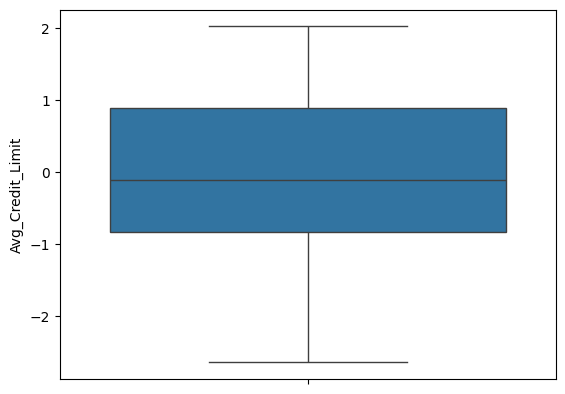

In [14]:
sns.boxplot(data=df['Avg_Credit_Limit'])
plt.show()

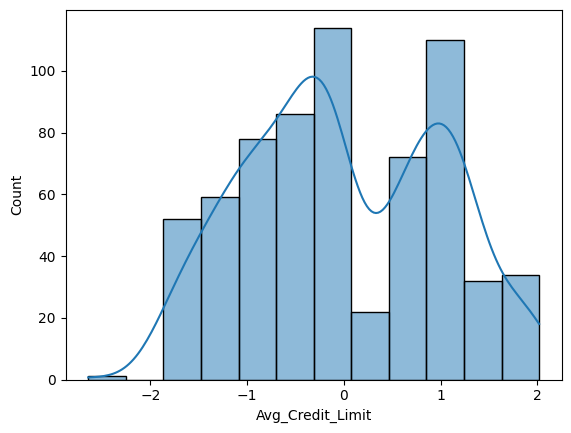

In [15]:
sns.histplot(data=df['Avg_Credit_Limit'], kde=True)
plt.show()

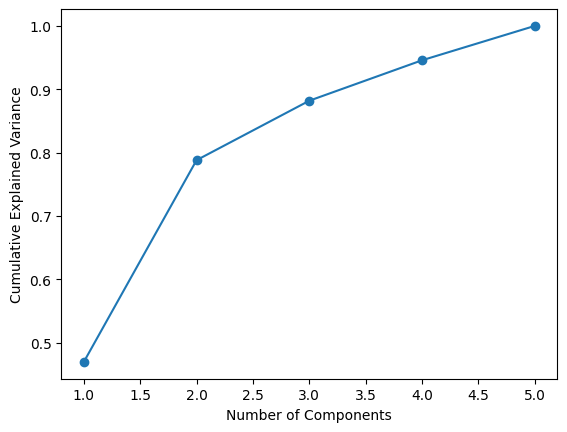

In [16]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(df_scaled)

explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

plt.figure()
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

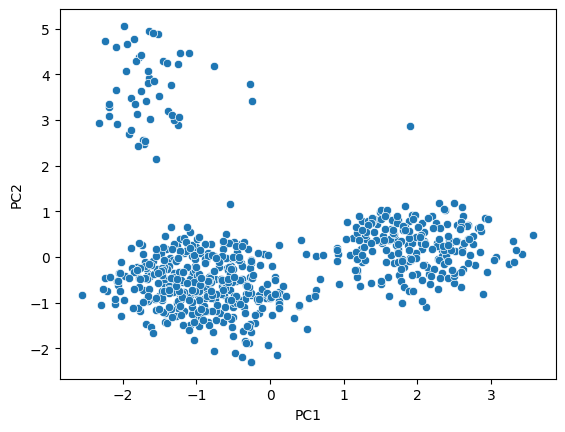

In [17]:
pca_2d  = PCA(n_components=2)

pca_2d_data =  pca_2d.fit_transform(df_scaled)
pca_2d_df = pd.DataFrame(pca_2d_data, columns=['PC1', 'PC2'])

sns.scatterplot(data = pca_2d_df, x="PC1", y="PC2")
plt.show()

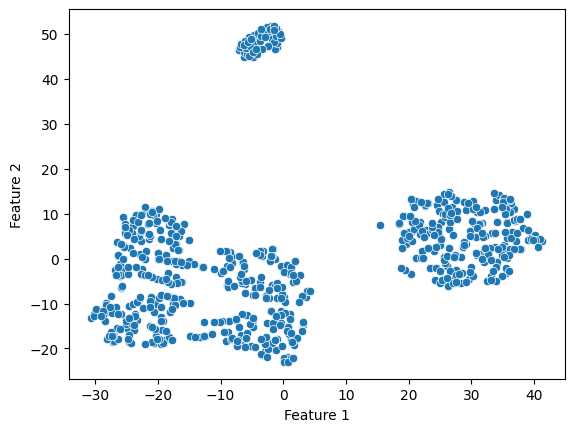

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tsne_reduced_data = tsne.fit_transform(df_scaled)

tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=["Feature 1", "Feature 2"])

sns.scatterplot(data=tsne_2d_data, x= "Feature 1", y = "Feature 2")
plt.show()

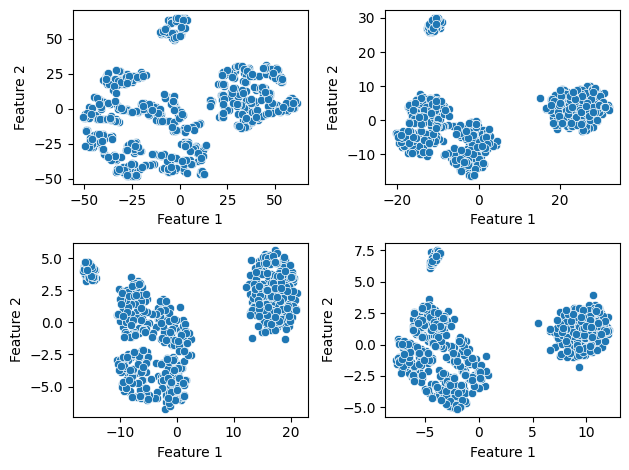

In [19]:
perplexity = [10, 50, 100, 150]

plt.figure()

for i in range(len(perplexity)):
    tnse = TSNE(n_components=2, perplexity=perplexity[i])
    tsne_reduced_data = tnse.fit_transform(df_scaled)
    red_data_df = pd.DataFrame(tsne_reduced_data, columns=['Feature 1', 'Feature 2'])

    plt.subplot(2,2, i+1)
    sns.scatterplot(data = red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout()

plt.show()


Euclidean -> distance between two points
Manhattan -> sum of abs diff  distance between two points
Cosine Similarity -> angle between vectors

In [20]:
from sklearn.cluster import KMeans

df_scaled = pd.DataFrame(df_scaled)
k_means_df = df_scaled.copy()

In [21]:
clusters = range(2, 11)

WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_

    WCSS.append(wcss)

    print("No. Clusters:", k, "\twcss:", wcss)

No. Clusters: 2 	wcss: 2407.501444527163
No. Clusters: 3 	wcss: 1128.3672091728938
No. Clusters: 4 	wcss: 889.477663090541
No. Clusters: 5 	wcss: 799.2532367072423
No. Clusters: 6 	wcss: 720.9325632822361
No. Clusters: 7 	wcss: 662.4184823905424
No. Clusters: 8 	wcss: 633.4939183965628
No. Clusters: 9 	wcss: 601.1249171114499
No. Clusters: 10 	wcss: 565.5653034632313


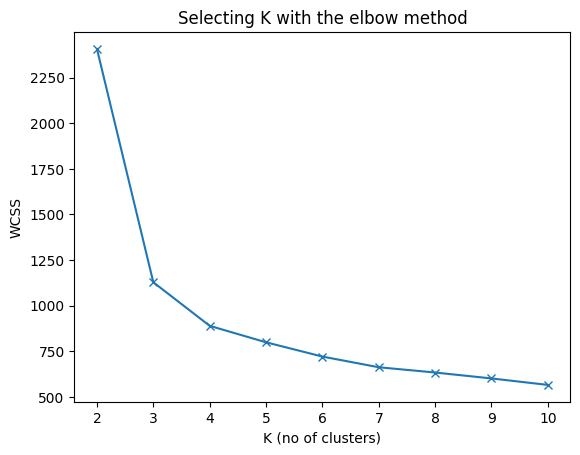

In [22]:
plt.plot(clusters, WCSS, 'x-')
plt.xlabel('K (no of clusters)')
plt.ylabel('WCSS')
plt.title('Selecting K with the elbow method')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

sil_score = []
cluster_list = range(2, 10)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds  = clusterer.fit_predict((df_scaled))
    score =  silhouette_score(k_means_df, preds)
    sil_score.append(score)
    
    print("No. Clusters:", n_clusters, "\tscore:", score)

No. Clusters: 2 	score: 0.48666211648416074
No. Clusters: 3 	score: 0.4881250450023665
No. Clusters: 4 	score: 0.38183343837327477
No. Clusters: 5 	score: 0.3429657078045466
No. Clusters: 6 	score: 0.25743577303643206
No. Clusters: 7 	score: 0.25723938231572674
No. Clusters: 8 	score: 0.24552748944637948
No. Clusters: 9 	score: 0.2504954172458151


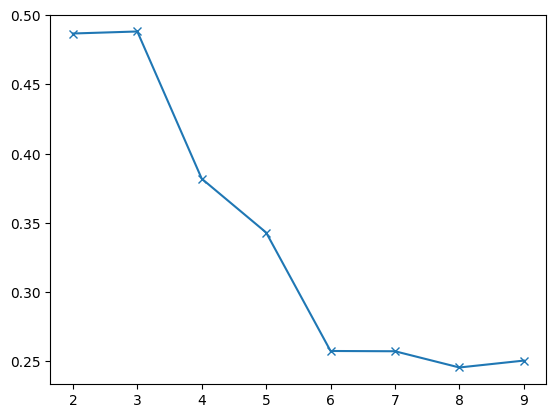

In [24]:
plt.plot(cluster_list, sil_score, 'x-')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(k_means_df)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [26]:
tsne_2d_data['k_means_segments'] = kmeans.labels_

[]

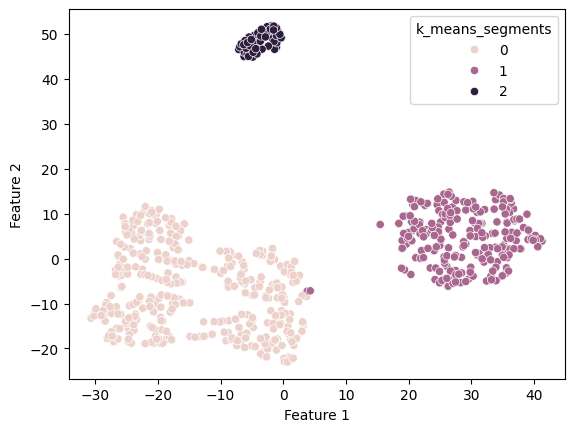

In [27]:
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='k_means_segments')
plt.plot()

In [28]:
df_ori['K_means_segments'] = kmeans.labels_

In [29]:
km_cluster_profile  = df_ori.groupby('K_means_segments').mean()

In [30]:
km_cluster_profile['count_in_each_segment'] = (
    df_ori.select_dtypes(include=np.number).groupby('K_means_segments')["Avg_Credit_Limit"].count().values
)

In [31]:
km_cluster_profile.style.highlight_max(color='red', axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
